In [ ]:
%pip install scikit-learn numpy pandas matplotlib

In [52]:
import pandas as pd
data = pd.read_csv('Student.csv')

In [53]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['race/ethnicity'] = label_encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = label_encoder.fit_transform(data['parental level of education'])
data['lunch'] = label_encoder.fit_transform(data['lunch'])
data['test preparation course'] = label_encoder.fit_transform(data['test preparation course'])



In [63]:
print(data)

     gender  race/ethnicity  parental level of education  lunch  \
0         1               0                            2      1   
1         0               3                            5      0   
2         1               4                            4      0   
3         1               1                            2      1   
4         1               4                            0      1   
..      ...             ...                          ...    ...   
995       1               2                            2      1   
996       1               3                            0      0   
997       0               2                            5      0   
998       0               2                            4      1   
999       1               0                            4      1   

     test preparation course  math score  reading score  writing score  
0                          0          67             67             63  
1                          1          40         

In [55]:
data.dropna(inplace=True)

In [56]:
target = 'writing score'
X = data.drop([f'{target}'], axis=1)
y = data[f'{target}']

In [57]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
# Feature scaling from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

In [67]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root mean squared error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

Mean Squared Error (MSE): 15.39
Mean Absolute Error (MAE): 3.23
Root mean squared error (RMSE): 3.92
R-squared (R2) score: 0.94


In [68]:
print(data)

     gender  race/ethnicity  parental level of education  lunch  \
0         1               0                            2      1   
1         0               3                            5      0   
2         1               4                            4      0   
3         1               1                            2      1   
4         1               4                            0      1   
..      ...             ...                          ...    ...   
995       1               2                            2      1   
996       1               3                            0      0   
997       0               2                            5      0   
998       0               2                            4      1   
999       1               0                            4      1   

     test preparation course  math score  reading score  writing score  
0                          0          67             67             63  
1                          1          40         

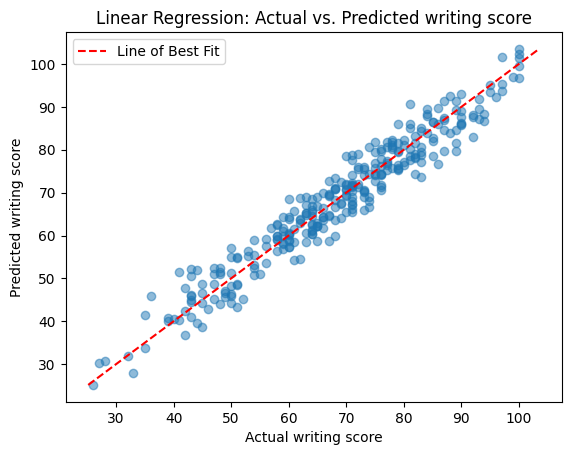

In [70]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel(f'Actual {target}')
plt.ylabel(f'Predicted {target}')
plt.title(f'Linear Regression: Actual vs. Predicted {target}')

# Add the line of best fit
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Line of Best Fit')

plt.legend()
plt.show()


In [71]:
import joblib

joblib.dump(model, "gpaPredictor.joblib")

['gpaPredictor.joblib']